In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
fpt=pd.read_csv(r'C:\Users\hp\Downloads\Test_set_flight.csv')
fpt.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [3]:
fpt.shape

(2671, 10)

In [4]:
fpt.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [5]:
fpt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [6]:
fpt.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64


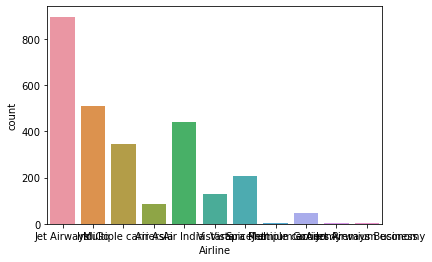

In [7]:
sns.countplot(x='Airline',data=fpt)
print(fpt['Airline'].value_counts())

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64


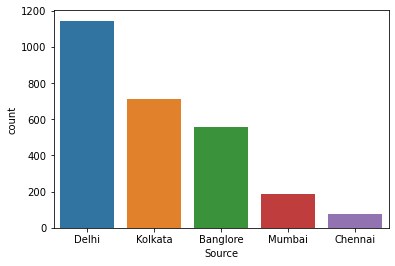

In [8]:
sns.countplot(x='Source',data=fpt)
print(fpt['Source'].value_counts())

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


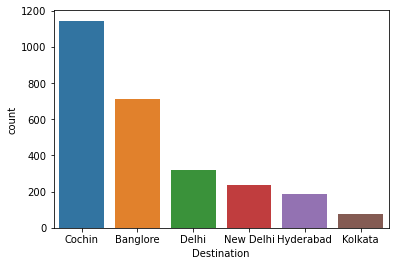

In [9]:
sns.countplot(x='Destination',data=fpt)
print(fpt['Destination'].value_counts())

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64


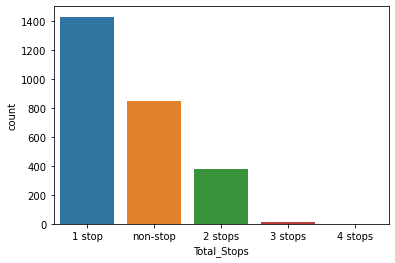

In [10]:
sns.countplot(x='Total_Stops',data=fpt)
print(fpt['Total_Stops'].value_counts())

In [11]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
for i in fpt.columns:
    if fpt[i].dtype=="object":
        fpt[i]=enc.fit_transform(fpt[i].values.reshape(-1,1))

In [12]:
fpt.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,4.0,39.0,2.0,1.0,76.0,138.0,150.0,10.0,0.0,5.0
1,3.0,10.0,3.0,0.0,65.0,31.0,353.0,248.0,0.0,5.0
2,4.0,22.0,2.0,1.0,76.0,156.0,566.0,148.0,0.0,3.0
3,6.0,22.0,2.0,1.0,76.0,48.0,633.0,36.0,0.0,5.0
4,0.0,27.0,0.0,2.0,16.0,198.0,135.0,216.0,4.0,5.0


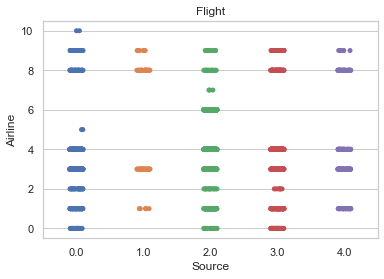

In [13]:
sns.set(style='whitegrid')
sns.stripplot(x='Source',y='Airline',data=fpt)
plt.title('Flight')
plt.show()

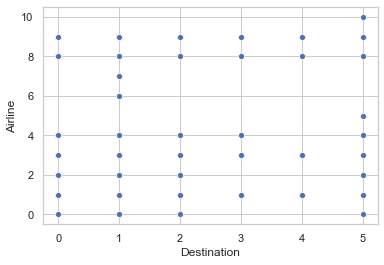

In [14]:
sns.scatterplot(x='Destination',y='Airline',data=fpt)

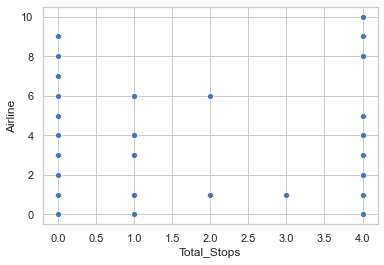

In [15]:
sns.scatterplot(x='Total_Stops',y='Airline',data=fpt)

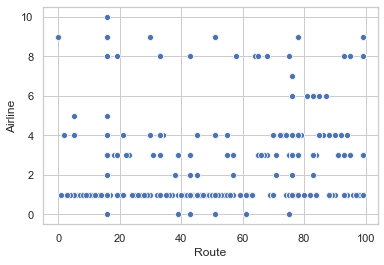

In [16]:
sns.scatterplot(x='Route',y='Airline',data=fpt)

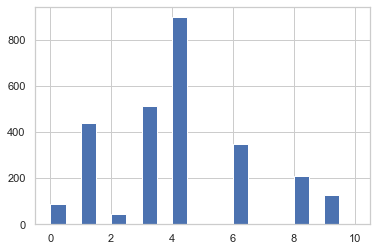

In [17]:
fpt.Airline.hist(bins=20)

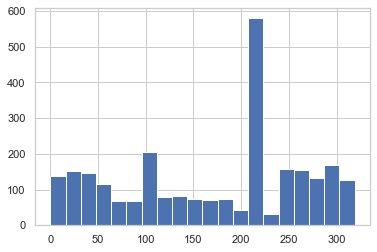

In [18]:
fpt.Duration.hist(bins=20)

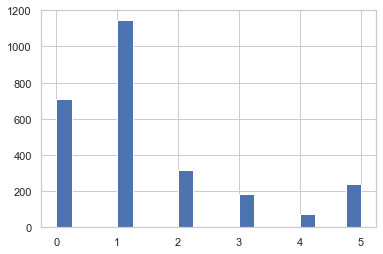

In [19]:
fpt.Destination.hist(bins=20)

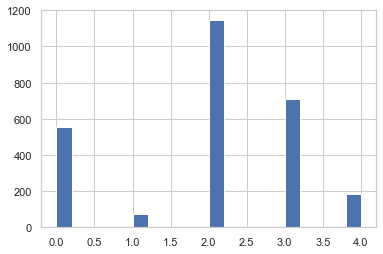

In [20]:
fpt.Source.hist(bins=20)

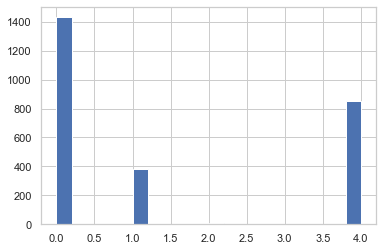

In [22]:
fpt.Total_Stops.hist(bins=20)

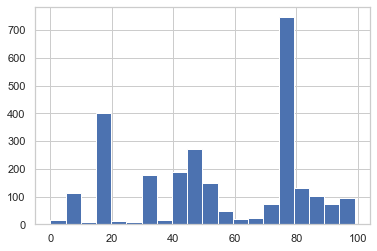

In [23]:
fpt.Route.hist(bins=20)

In [24]:
fpt.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000
mean,3.972669,23.662673,1.961438,1.432797,54.356421,96.249719,435.586672,169.453014,1.422688,4.634594
std,2.295657,12.536017,1.184328,1.467971,27.128993,54.620936,193.250349,93.907162,1.795728,0.760781
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,14.000000,2.000000,0.000000,33.000000,48.000000,276.000000,91.000000,0.000000,5.000000
50%,4.000000,24.000000,2.000000,1.000000,51.000000,88.000000,481.000000,209.000000,0.000000,5.000000
75%,6.000000,35.000000,3.000000,2.000000,76.000000,146.000000,600.000000,241.000000,4.000000,5.000000
max,10.000000,43.000000,4.000000,5.000000,99.000000,198.000000,703.000000,319.000000,4.000000,5.000000


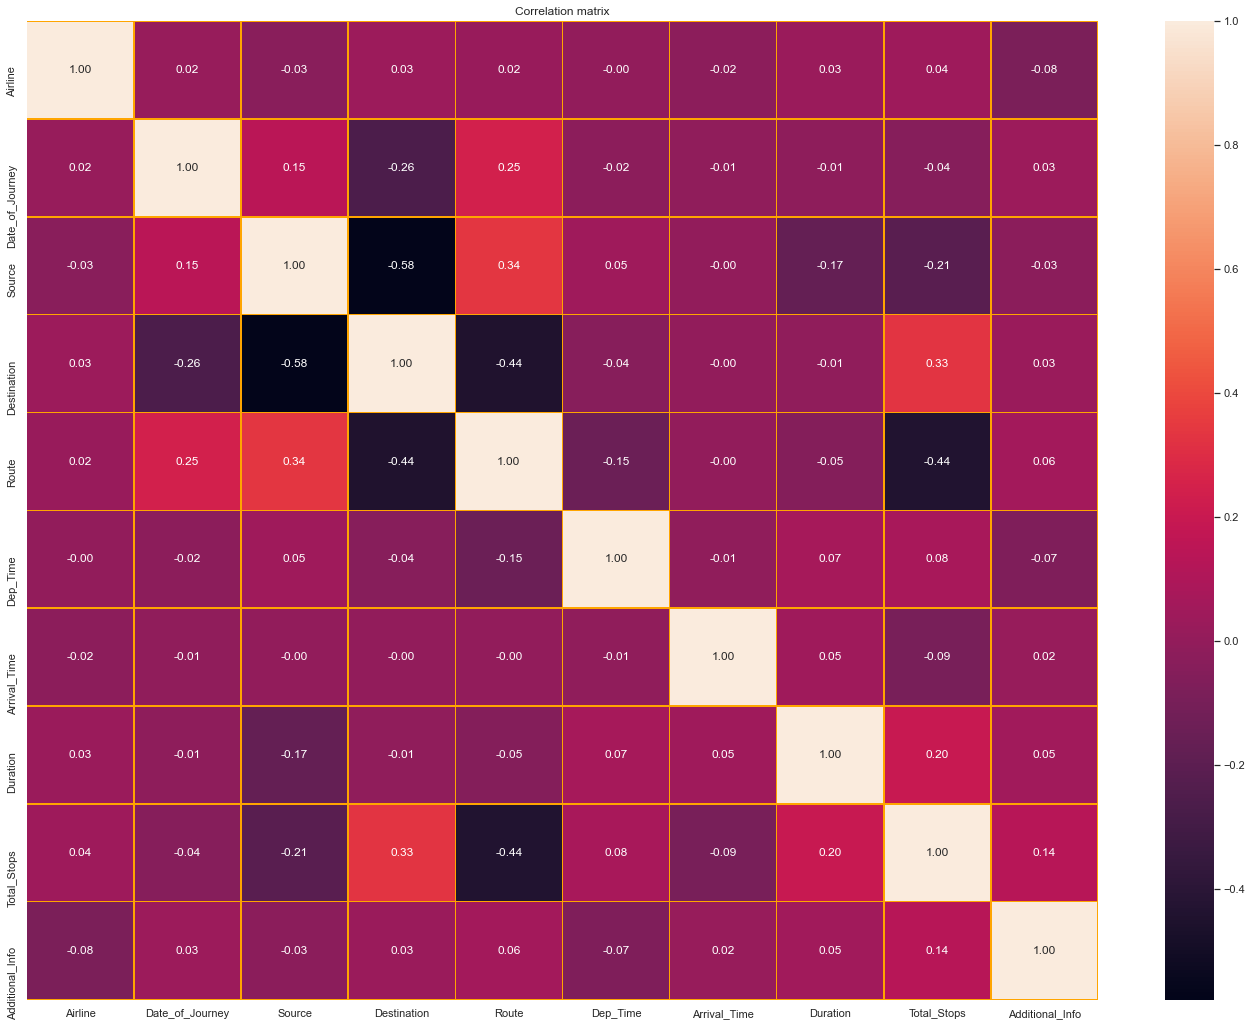

In [25]:
corr=fpt.corr()                                               # multivariate analysis
plt.figure(figsize=(24,18))
sns.heatmap(corr,annot=True,linewidths=0.5,linecolor='orange',fmt='.2f',)
plt.title('Correlation matrix')
plt.show()

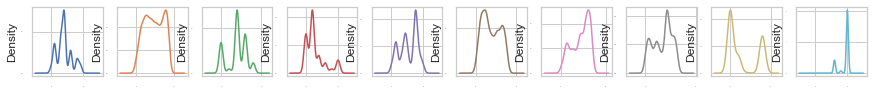

In [26]:
fpt.plot(kind='density',subplots=True,layout=(8,12),fontsize=1,figsize=(18,12),sharex=False,legend=False)
plt.show()

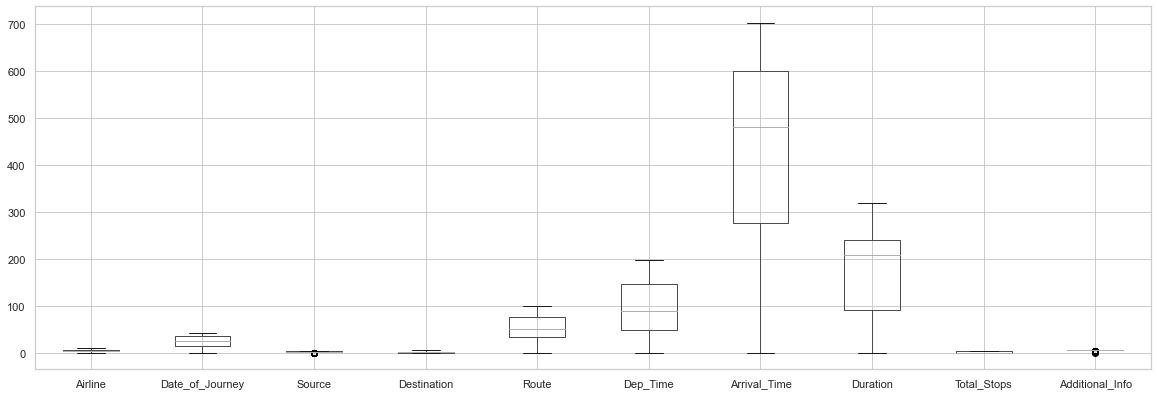

In [27]:
fpt.iloc[:,0:10].boxplot(figsize=(20,8))
plt.subplots_adjust(bottom=0.25)
plt.show()

In [28]:
fpt.skew()

Airline            0.483882
Date_of_Journey   -0.044181
Source            -0.424997
Destination        1.263630
Route             -0.281807
Dep_Time           0.178928
Arrival_Time      -0.523661
Duration          -0.275404
Total_Stops        0.672623
Additional_Info   -1.719119
dtype: float64

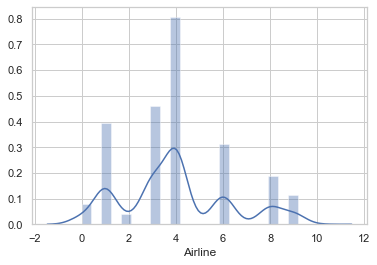

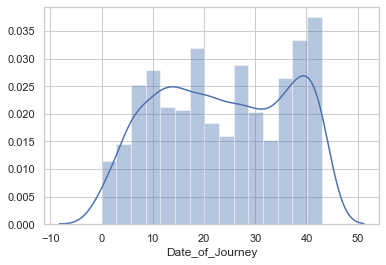

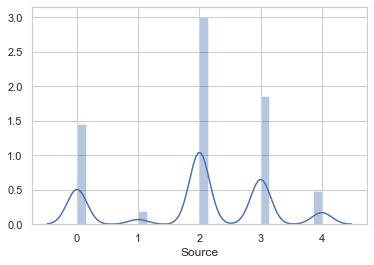

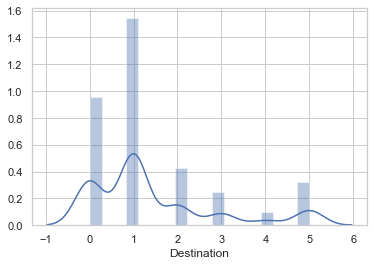

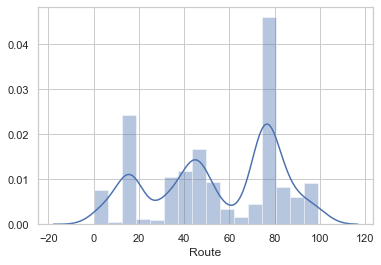

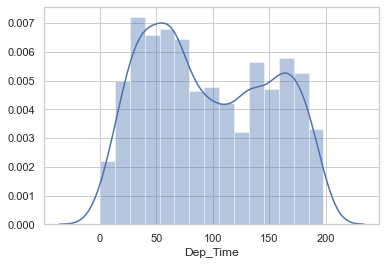

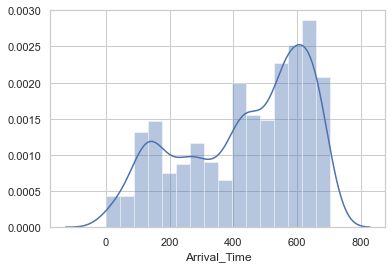

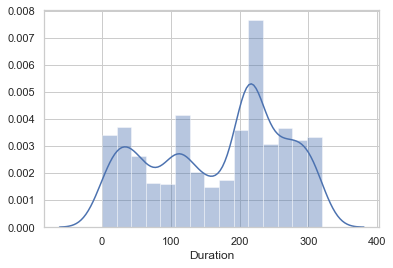

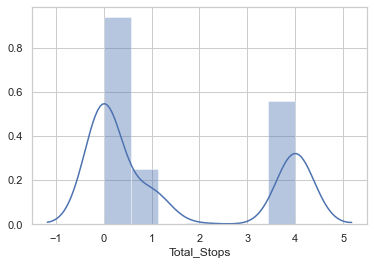

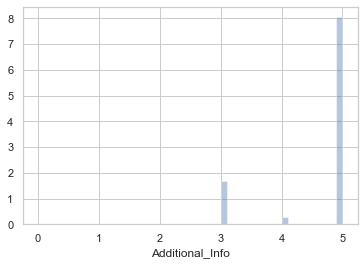

In [29]:
for j in fpt.columns:
    plt.figure()
    sns.distplot(fpt[j])

In [30]:
import joblib
fit_model=joblib.load('flightpricemodel.obj')

In [31]:
fit_model

RandomForestRegressor()

In [32]:
prediction=fit_model.predict(fpt)

In [33]:
prediction

array([7065.57, 7086.87, 7065.57, ..., 7065.57, 7065.57, 7065.57])

In [34]:
dpf=pd.DataFrame(prediction)
dpf

,0
0,7065.57
1,7086.87
2,7065.57
3,7065.57
4,5668.23
...,...
2666,7086.87
2667,6355.19
2668,7065.57
2669,7065.57
